In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()
model = ChatOpenAI()

In [3]:
# define the state
class BlogState(TypedDict):

    title: str
    outline: str
    content: str

In [6]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [7]:
def create_blog(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']
    outline = state['outline']

    # call llm gen outline
    prompt = f'Write a detailed blog on the title {title} using the following outline {outline}'
    content = model.invoke(prompt).content

    # update state
    state['content'] = content

    return state

In [9]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)


# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()

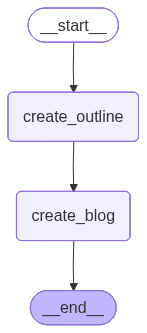

In [10]:
workflow

In [11]:
initial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(initial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': 'I. Introduction \n    A. Background information on AI\n    B. Importance of AI in various industries\n    C. Overview of AI development in India\n\nII. History of AI in India \n    A. Early adoption of AI technologies \n    B. Growth of AI startups in India \n    C. Government initiatives to promote AI research and development \n\nIII. Impact of AI on Indian economy \n    A. Role of AI in job creation and automation \n    B. AI in healthcare, agriculture, and other key sectors \n    C. Potential for economic growth through AI \n\nIV. Challenges and opportunities \n    A. Ethical considerations in AI development \n    B. Skills gap in AI workforce \n    C. Role of education and training in promoting AI adoption \n\nV. Future outlook \n    A. AI trends in India \n    B. Predictions for AI development in the next decade \n    C. Opportunities for collaboration and innovation in AI \n\nVI. Conclusion \n    A. Recap of key points discussed \n    

In [14]:
print(final_state['outline'])

I. Introduction 
    A. Background information on AI
    B. Importance of AI in various industries
    C. Overview of AI development in India

II. History of AI in India 
    A. Early adoption of AI technologies 
    B. Growth of AI startups in India 
    C. Government initiatives to promote AI research and development 

III. Impact of AI on Indian economy 
    A. Role of AI in job creation and automation 
    B. AI in healthcare, agriculture, and other key sectors 
    C. Potential for economic growth through AI 

IV. Challenges and opportunities 
    A. Ethical considerations in AI development 
    B. Skills gap in AI workforce 
    C. Role of education and training in promoting AI adoption 

V. Future outlook 
    A. AI trends in India 
    B. Predictions for AI development in the next decade 
    C. Opportunities for collaboration and innovation in AI 

VI. Conclusion 
    A. Recap of key points discussed 
    B. Final thoughts on the rise of AI in India 
    C. Call to action for 